<a href="https://colab.research.google.com/github/anshumansinghbba2023-sudo/Consumer-Behavior-Analysis-Dashboard-Power-bi/blob/main/BANK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Data Name*** = **Bank Marketing**


#***Data Source***


**https://archive.ics.uci.edu/dataset/222/bank+marketing**

#***Basis Setup and Data Loading***

In [ ]:
import pandas as pd

In [ ]:
bank =pd.read_csv("/content/bank-full.csv")

###**Show first 5 rows**

In [ ]:
bank.head()

age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   may         fri       487         2    999         0   
1  telephone   may         fri       346         4    999         0   
2  telephone   jun         wed       227         1    999         0   
3  telephone   jun         fri        17         3    999         0   
4   cellular   nov         mon        58         1    999         0   

      poutcome   y  
0  nonexistent  no  
1  nonexistent  no  
2  nonexistent  no  
3  nonexistent  no  
4  nonexistent  no

#***Data Summary***

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

***Dataset Characteristics***
Multivariate

***Subject Area***
Business

***Feature Type***
Categorical, Integer

***Instances***
45211

***Features***
16

In [ ]:
bank.shape

(4119, 16)

**4119 Rows and 21 Columns**

###***Columns***

In [ ]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

## **Data types**

In [ ]:
bank.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

###**Info about the data types and Null**

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          4119 non-null   int64 
 1   job          4119 non-null   object
 2   marital      4119 non-null   object
 3   education    4119 non-null   object
 4   default      4119 non-null   object
 5   housing      4119 non-null   object
 6   loan         4119 non-null   object
 7   contact      4119 non-null   object
 8   month        4119 non-null   object
 9   day_of_week  4119 non-null   object
 10  duration     4119 non-null   int64 
 11  campaign     4119 non-null   int64 
 12  pdays        4119 non-null   int64 
 13  previous     4119 non-null   int64 
 14  poutcome     4119 non-null   object
 15  y            4119 non-null   object
dtypes: int64(5), object(11)
memory usage: 515.0+ KB


###**Check for Null values**
**0 Null values**

In [ ]:
bank.isnull().sum()
# check for null values

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

###**Statistics Summary**
A statistics summary is a quick way to understand the basic numerical details about your dataset. It helps you explore:

Central values (mean, median)

Spread (min, max, standard deviation)

Distribution (25%, 50%, 75% percentiles)

Shape of the data (e.g., if it's skewed)

In [ ]:
bank.describe()

age     duration     campaign        pdays     previous
count  4119.000000  4119.000000  4119.000000  4119.000000  4119.000000
mean     40.113620   256.788055     2.537266   960.422190     0.190337
std      10.313362   254.703736     2.568159   191.922786     0.541788
min      18.000000     0.000000     1.000000     0.000000     0.000000
25%      32.000000   103.000000     1.000000   999.000000     0.000000
50%      38.000000   181.000000     2.000000   999.000000     0.000000
75%      47.000000   317.000000     3.000000   999.000000     0.000000
max      88.000000  3643.000000    35.000000   999.000000     6.000000

***What each row means:***

***count:*** How many values are there (non-null)?

***mean:*** The average

***std:*** Standard deviation (how spread out the data is)

***min:*** Smallest value

***25%, 50%, 75%:** Percentiles (50% is the median)

***max:*** Largest value

##***Drop Columns***

##***Import libraries for Visualisation***

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## ***Marital status of the clients***

In [ ]:
bank["marital"].value_counts()

marital
married     2509
single      1153
divorced     446
unknown       11
Name: count, dtype: int64

In [ ]:
m1=bank[bank["marital"]=="married"] ##Seperate data only for married clients

In [ ]:
m1

age           job  marital          education  default  housing  \
0      30   blue-collar  married           basic.9y       no      yes   
2      25      services  married        high.school       no      yes   
3      38      services  married           basic.9y       no  unknown   
4      47        admin.  married  university.degree       no      yes   
7      41  entrepreneur  married  university.degree  unknown      yes   
...   ...           ...      ...                ...      ...      ...   
4109   63       retired  married        high.school       no       no   
4111   30    technician  married  university.degree       no       no   
4114   30        admin.  married           basic.6y       no      yes   
4115   39        admin.  married        high.school       no      yes   
4117   58        admin.  married        high.school       no       no   

         loan    contact month day_of_week  duration  campaign  pdays  \
0          no   cellular   may         fri       487         2    999   
2          no  telephone   jun         wed       227         1    999   
3     unknown  telephone   jun         fri        17         3    999   
4          no   cellular   nov         mon        58         1    999   
7          no   cellular   nov         mon        44         2    999   
...       ...        ...   ...         ...       ...       ...    ...   
4109       no   cellular   oct         wed      1386         1    999   
4111      yes   cellular   jun         fri       131         1    999   
4114      yes   cellular   jul         thu        53         1    999   
4115       no  telephone   jul         fri       219         1    999   
4117       no   cellular   aug         fri       528         1    999   

      previous     poutcome   y  
0            0  nonexistent  no  
2            0  nonexistent  no  
3            0  nonexistent  no  
4            0  nonexistent  no  
7            0  nonexistent  no  
...        ...          ...  ..  
4109         0  nonexistent  no  
4111         1      failure  no  
4114         0  nonexistent  no  
4115         0  nonexistent  no  
4117         0  nonexistent  no  

[2509 rows x 16 columns]

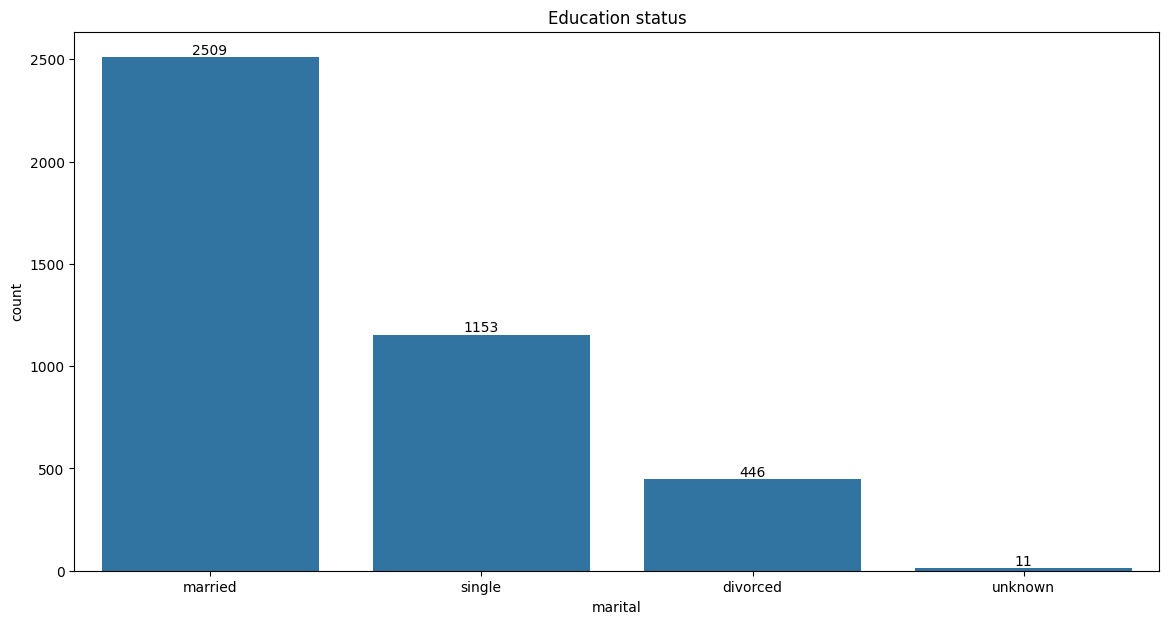

In [ ]:
plt.figure(figsize=(14,7))
ax=sns.countplot(x="marital",data=bank)
ax.bar_label(ax.containers[0])
plt.title("Education status")
plt.show()

In [ ]:
x = bank["marital"].value_counts().index
y = bank["marital"].value_counts().values


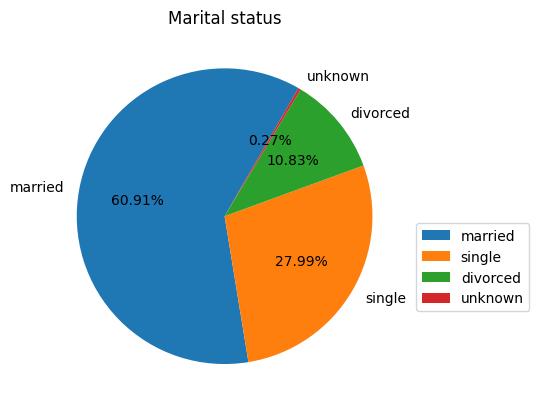

In [ ]:
plt.pie(y,labels=x,startangle=60,autopct="%0.2f%%")
plt.title("Marital status")
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()



In [ ]:
# Education status

# Education status of the clients

In [ ]:
bank["education"].value_counts()

education
university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: count, dtype: int64

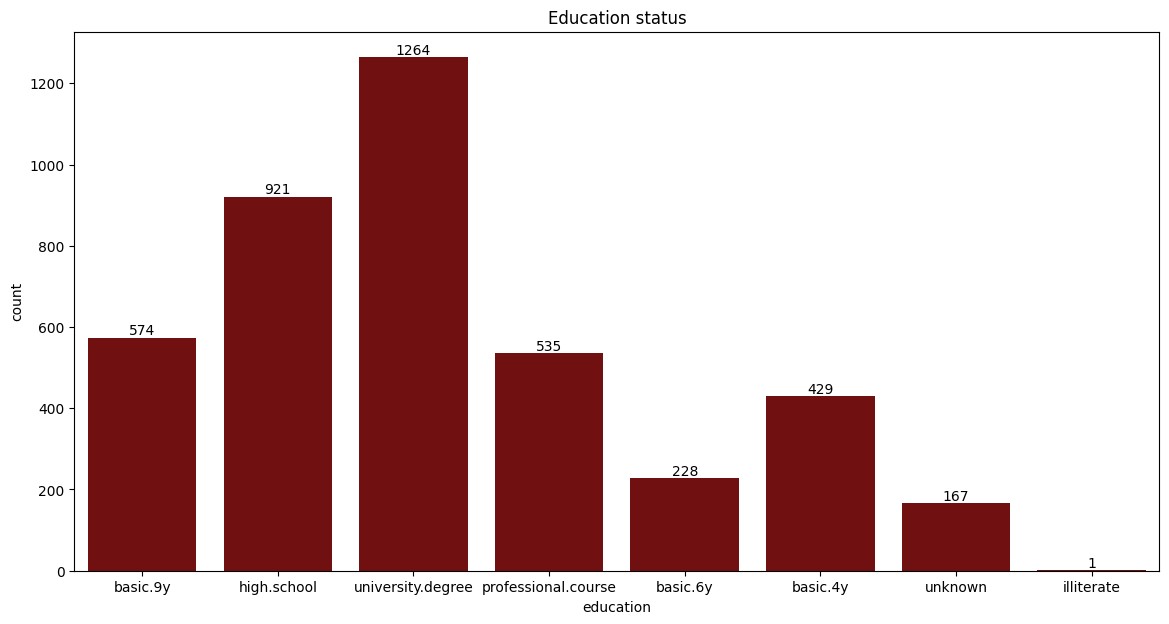

In [ ]:
plt.figure(figsize=(14,7))
ax=sns.countplot(x="education",data=bank,color="maroon")
ax.bar_label(ax.containers[0])
plt.title("Education status")
plt.show()

In [ ]:
bank.head()

age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   may         fri       487         2    999         0   
1  telephone   may         fri       346         4    999         0   
2  telephone   jun         wed       227         1    999         0   
3  telephone   jun         fri        17         3    999         0   
4   cellular   nov         mon        58         1    999         0   

      poutcome   y  
0  nonexistent  no  
1  nonexistent  no  
2  nonexistent  no  
3  nonexistent  no  
4  nonexistent  no

In [ ]:
## housing loan clients

## Housing loan clients

In [ ]:
bank["housing"].value_counts()

housing
yes        2175
no         1839
unknown     105
Name: count, dtype: int64

In [ ]:
x = bank["housing"].value_counts().index
y = bank["housing"].value_counts().values

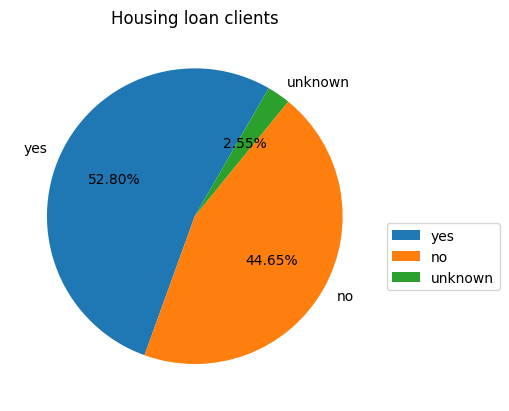

In [ ]:
plt.pie(y,labels=x,startangle=60,autopct="%0.2f%%")
plt.title("Housing loan clients")
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()


In [ ]:
#Job status of the clients

#Job status of the clients

In [ ]:
bank["job"].value_counts()

job
admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: count, dtype: int64

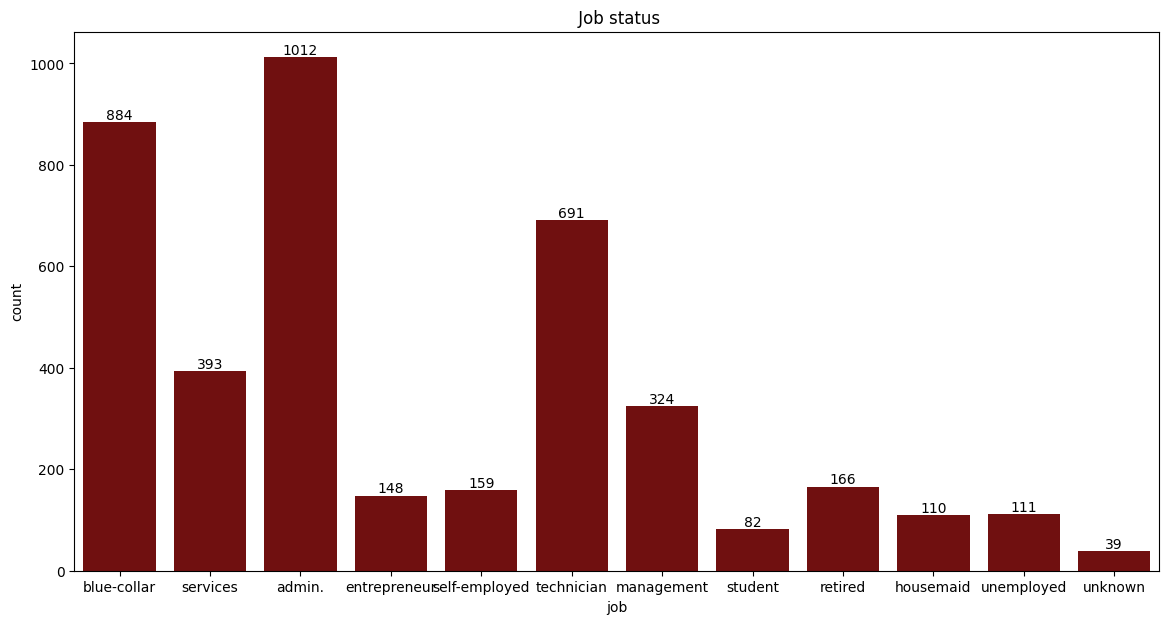

In [ ]:
plt.figure(figsize=(14,7))
ax=sns.countplot(x="job",data=bank,color="maroon")
ax.bar_label(ax.containers[0])
plt.title(" Job status")
plt.show()

In [ ]:
bank["job"].unique()

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)

In [ ]:
# Personal loan clients


# Personal loan clients

In [ ]:
bank["loan"].value_counts()

loan
no         3349
yes         665
unknown     105
Name: count, dtype: int64

In [ ]:
x = bank["loan"].value_counts().index
y = bank["loan"].value_counts().values

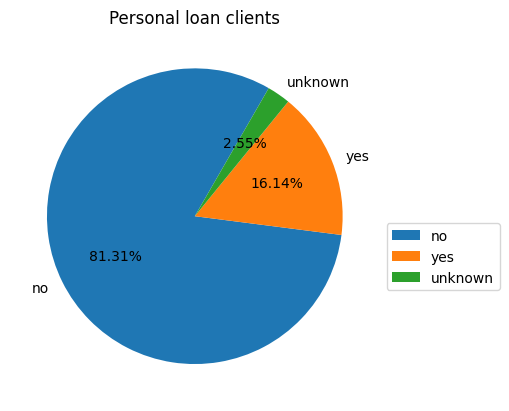

In [ ]:
plt.pie(y,labels=x,startangle=60,autopct="%0.2f%%")
plt.title("Personal loan clients")
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
	#Contact communication type

	# Contact communication type

In [ ]:
bank["contact"].value_counts()

contact
cellular     2652
telephone    1467
Name: count, dtype: int64

In [ ]:
x = bank["contact"].value_counts().index
y = bank["contact"].value_counts().values

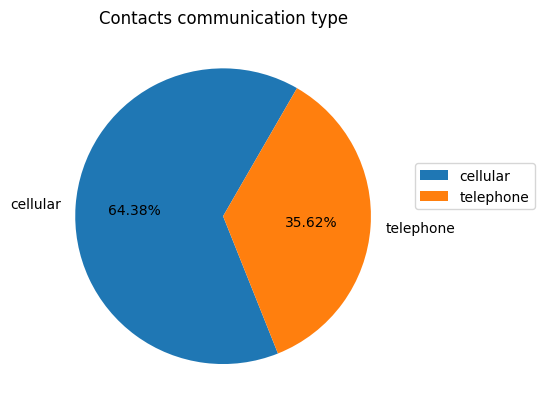

In [ ]:
plt.pie(y,labels=x,startangle=60,autopct="%0.2f%%")
plt.title("Contacts communication type")
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# last contact month

# last contact month

In [ ]:
bank["month"].value_counts()

month
may    1378
jul     711
aug     636
jun     530
nov     446
apr     215
oct      69
sep      64
mar      48
dec      22
Name: count, dtype: int64

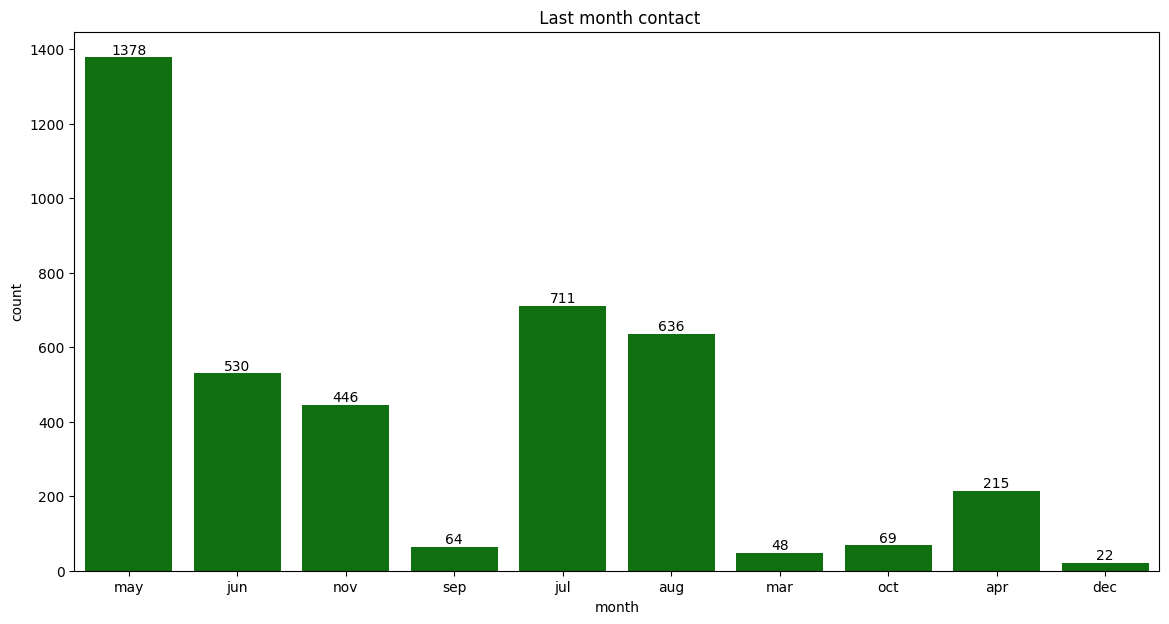

In [ ]:
plt.figure(figsize=(14,7))
ax=sns.countplot(x="month",data=bank,color="green")
ax.bar_label(ax.containers[0])
plt.title(" Last month contact")
plt.show()

In [ ]:
#Last contact day

	Last contact day

In [ ]:
bank["day_of_week"].value_counts()

day_of_week
thu    860
mon    855
tue    841
wed    795
fri    768
Name: count, dtype: int64

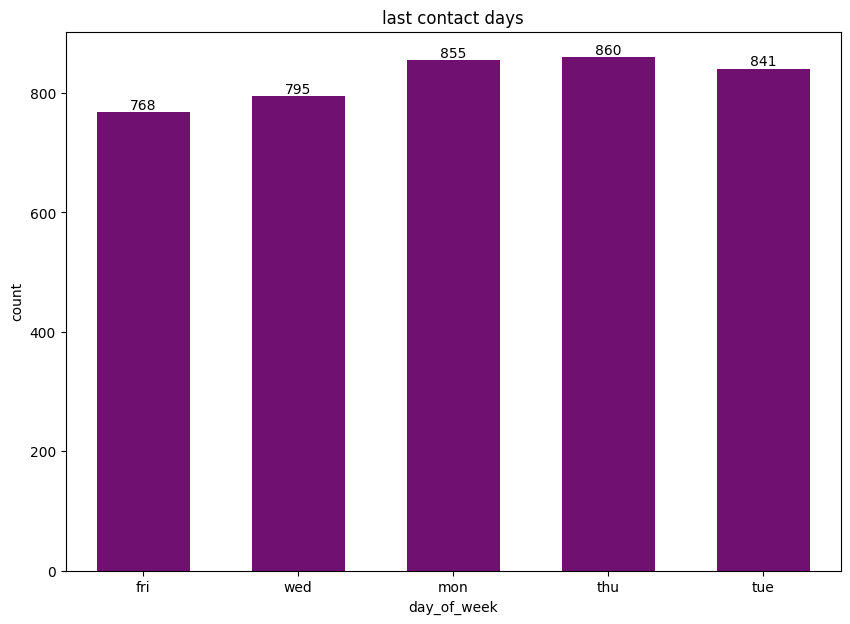

In [ ]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x="day_of_week",data=bank,width=0.6,color = "purple")
ax.bar_label(ax.containers[0])
plt.title("last contact days")
plt.show()

In [ ]:
#Days since last contact

	Days since last contact

In [ ]:
## 999 never contacted

In [ ]:
bank["pdays"].value_counts()

pdays
999    3959
3        52
6        42
4        14
7        10
10        8
12        5
5         4
2         4
1         3
9         3
15        2
18        2
16        2
0         2
13        2
11        1
19        1
17        1
21        1
14        1
Name: count, dtype: int64

In [ ]:
bank.head(2)

age          job  marital    education default housing loan    contact  \
0   30  blue-collar  married     basic.9y      no     yes   no   cellular   
1   39     services   single  high.school      no      no   no  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome   y  
0   may         fri       487         2    999         0  nonexistent  no  
1   may         fri       346         4    999         0  nonexistent  no

In [ ]:
### no of contacts during this campaign

mostly 0

In [ ]:
bank["campaign"].value_counts()

campaign
1     1764
2     1039
3      549
4      291
5      142
6       99
7       60
8       36
9       32
10      20
11      19
12      16
17      14
13      11
16       7
14       6
15       2
29       2
22       2
19       2
23       2
27       1
18       1
24       1
35       1
Name: count, dtype: int64

In [ ]:
#Previous outcome

In [ ]:
bank["previous"].value_counts()

previous
0    3523
1     475
2      78
3      25
4      14
5       2
6       2
Name: count, dtype: int64

#outcome of previous marketing campaign


In [ ]:
bank["poutcome"].value_counts()

poutcome
nonexistent    3523
failure         454
success         142
Name: count, dtype: int64

In [ ]:
bank.head(5)

age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   may         fri       487         2    999         0   
1  telephone   may         fri       346         4    999         0   
2  telephone   jun         wed       227         1    999         0   
3  telephone   jun         fri        17         3    999         0   
4   cellular   nov         mon        58         1    999         0   

      poutcome   y  
0  nonexistent  no  
1  nonexistent  no  
2  nonexistent  no  
3  nonexistent  no  
4  nonexistent  no

In [ ]:
bank["y"].value_counts()

y
no     3668
yes     451
Name: count, dtype: int64

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
bank

age            job   marital            education  default  housing  \
0      30    blue-collar   married             basic.9y       no      yes   
1      39       services    single          high.school       no       no   
2      25       services   married          high.school       no      yes   
3      38       services   married             basic.9y       no  unknown   
4      47         admin.   married    university.degree       no      yes   
5      32       services    single    university.degree       no       no   
6      32         admin.    single    university.degree       no      yes   
7      41   entrepreneur   married    university.degree  unknown      yes   
8      31       services  divorced  professional.course       no       no   
9      35    blue-collar   married             basic.9y  unknown       no   
10     25       services    single             basic.6y  unknown      yes   
11     36  self-employed    single             basic.4y       no       no   
12     36         admin.   married          high.school       no       no   
13     47    blue-collar   married             basic.4y       no      yes   
14     29         admin.    single          high.school       no       no   
15     27       services    single    university.degree       no       no   
16     44         admin.  divorced    university.degree       no       no   
17     46         admin.  divorced    university.degree       no      yes   
18     45   entrepreneur   married    university.degree  unknown      yes   
19     50    blue-collar   married             basic.4y       no       no   
20     55       services   married             basic.6y  unknown      yes   
21     39     technician  divorced          high.school       no       no   
22     29     technician    single    university.degree       no      yes   
23     40     management   married          high.school       no       no   
24     44     technician   married  professional.course  unknown      yes   
25     38     technician   married  professional.course       no      yes   
26     36     technician  divorced  professional.course       no       no   
27     28    blue-collar   married             basic.6y  unknown       no   
28     47         admin.    single              unknown  unknown       no   
29     34         admin.   married    university.degree       no       no   
30     38     technician   married    university.degree       no      yes   
31     33       services   married          high.school  unknown      yes   
32     51     technician    single    university.degree       no       no   
33     30    blue-collar    single             basic.4y  unknown      yes   
34     48     technician   married    university.degree       no       no   
35     28    blue-collar    single             basic.9y       no      yes   
36     36    blue-collar   married             basic.6y       no      yes   
37     46     management  divorced          high.school       no       no   
38     31     technician    single              unknown       no      yes   
39     20        student    single              unknown       no       no   
40     35       services   married          high.school  unknown      yes   
41     38    blue-collar   married             basic.9y  unknown  unknown   
42     76        retired   married    university.degree       no       no   
43     45   entrepreneur  divorced  professional.course       no      yes   
44     32      housemaid   married             basic.4y       no      yes   
45     39     management    single    university.degree  unknown       no   
46     32         admin.   married    university.degree       no       no   
47     29         admin.    single             basic.9y       no       no   
48     44       services   married  professional.course       no       no   
49     32       services   married          high.school       no       no   
50     56        retired   married    university.degree       no      yes   
51

In [ ]:
bank.corr(numeric_only=True)

age  duration  campaign     pdays  previous
age       1.000000  0.041299 -0.014169 -0.043425  0.050931
duration  0.041299  1.000000 -0.085348 -0.046998  0.025724
campaign -0.014169 -0.085348  1.000000  0.058742 -0.091490
pdays    -0.043425 -0.046998  0.058742  1.000000 -0.587941
previous  0.050931  0.025724 -0.091490 -0.587941  1.000000

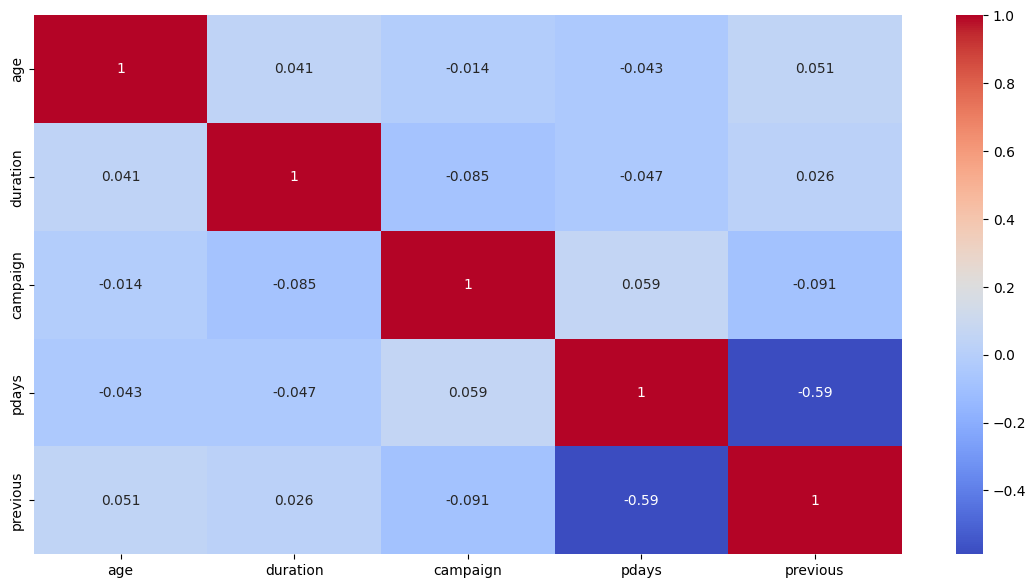

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(bank.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()


<Axes: ylabel='month'>

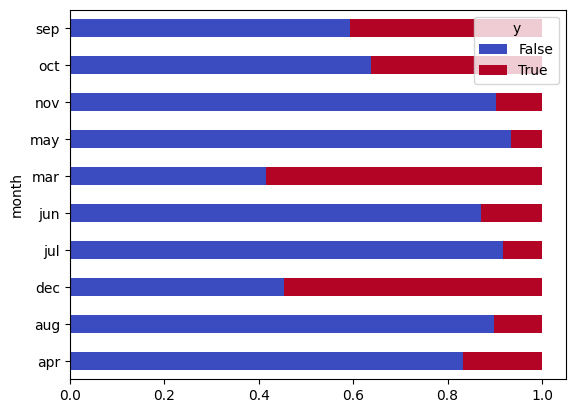

In [ ]:
pd.crosstab(bank['month'], bank['y']=="yes", normalize='index').plot(kind='barh', stacked=True, colormap='coolwarm')